# Análisis Descriptivo: Análisis de Tendencias de las ventas del negocio

El análisis de tendencia es una técnica estadística que se utiliza para identificar patrones o tendencias en un conjunto de datos a lo largo del tiempo. El análisis de tendencia es utilizado para predecir la dirección futura del comportamiento de los datos basándose en su comportamiento pasado.

### Carga de las librerías de pyhton necesarias

In [7]:
# Debe instalar las librerias necesarias antes del import
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

Las librerías de Python son conjuntos de código predefinidos que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

### Conexión a SQL Server y extracción de los datos

- Explique línea a línea el código mostrado abajo. Debe explicar tambien la query. Puede probar aparte la query desde Azure Data Studio o directamente desde SQL Server Managment Studio.

Esta línea establece una conexión a una base de datos SQL Server. Está utilizando el driver de SQL Server, conectándose a un servidor llamado T04W01, a la base de datos AdventureWorks2019, y usando una conexión de confianza (autenticación de Windows).

Esta es una consulta SQL que:

* Selecciona el año y mes de la fecha de orden.
* Suma el total debido (ventas) para cada combinación de año y mes.
* Agrupa los resultados por año y mes.
* Ordena los resultados por año y mes.

In [9]:
conn_str = pyodbc.connect('Driver={SQL Server};' 
                          'Server=T04W01;' #Nombre del servidor
                          'Database=AdventureWorks2019;'
                          'Trusted_Connection=yes;')
# En Server=BALRODJJ debes colocar el nombre de tu base de datos.
# Lo demás se deja igual

input_query = '''select   			
	 year(t1.OrderDate) as 'año',  
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'   
from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate)   	
	order by year(t1.OrderDate), month(t1.OrderDate)'''     

ventas = pd.read_sql(input_query, conn_str)

#Esta línea ejecuta la consulta SQL definida en input_query en la conexión de base de datos 
#Especificada por conn_str, y carga los resultados en un DataFrame de pandas llamado ventas.

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_9796\318230031.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas = pd.read_sql(input_query, conn_str)


In [10]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### El código **no** da error, sin embargo imprime un `warning` donde se sugiere el uso de `SQLAlchemy` en vez de `pyodbc`. Investigue como se hace la conexión a SQL Server con SQLAlchemy utilizando la misma base de datos , pruebe con la misma query anterior, guardar los resultados en un nuevo dataframe usando read_sql e imprima la tabla. Explicar linea por linea el código utilizado.

### Exploración del dataset extraído (ventas)

- Muestre la información general del dataframe (info):

In [11]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     38 non-null     int64  
 1   mes     38 non-null     int64  
 2   ventas  38 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


- Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [12]:
ventas.describe()

,año,mes,ventas
count,38.00,38.00,38.00
mean,2012.42,6.45,3242547.00
std,1.00,3.41,1787700.91
min,2011.00,1.00,54151.48
25%,2012.00,4.00,2013702.89
50%,2012.00,6.00,3256597.82
75%,2013.00,9.00,4535017.18
max,2014.00,12.00,8097036.31


- Mostrar las dimensiones del dataset

In [13]:
ventas.shape

(38, 3)

- Imprimir en un objeto tipo Index todas las columnas del dataframe

In [14]:
ventas.columns

Index(['año', 'mes', 'ventas'], dtype='object')

- Muestre el contenido de las primeras 15 líneas del dataframe

In [15]:
ventas.head(15)

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


- Muestre las últimas cinco líneas del dataframe

In [16]:
ventas.tail()

,año,mes,ventas
33,2014,2,1478213.29
34,2014,3,8097036.31
35,2014,4,1985886.15
36,2014,5,6006183.21
37,2014,6,54151.48


- Calcule Correlaciones y Covarianzas. Explicar resultados

* Correlación entre año y mes (-0.40):

> Indica una correlación negativa moderada.
> Sugiere que a medida que avanza el año, los valores del mes tienden a disminuir ligeramente.


* Correlación entre año y ventas (0.42):

> Muestra una correlación positiva moderada.
>Implica que las ventas tienden a aumentar ligeramente con el paso de los años.


* Correlación entre mes y ventas (-0.04):

>Indica una correlación negativa muy débil, casi inexistente.
>Sugiere que prácticamente no hay relación lineal entre el mes y las ventas

In [17]:
ventas.corr()

,año,mes,ventas
año,1.00,-0.40,0.42
mes,-0.40,1.00,-0.04
ventas,0.42,-0.04,1.00


In [18]:
ventas.cov()

,año,mes,ventas
año,1.01,-1.38,750498.19
mes,-1.38,11.66,-241446.93
ventas,750498.19,-241446.93,3195874540096.30


## Visualización gráfica de los datos

### Gráfico de barras de las ventas por mes

Se realiza una exploración visual de curva que dibuja las ventas agrupadas por mes.

- Explique línea por línea el siguiente código:

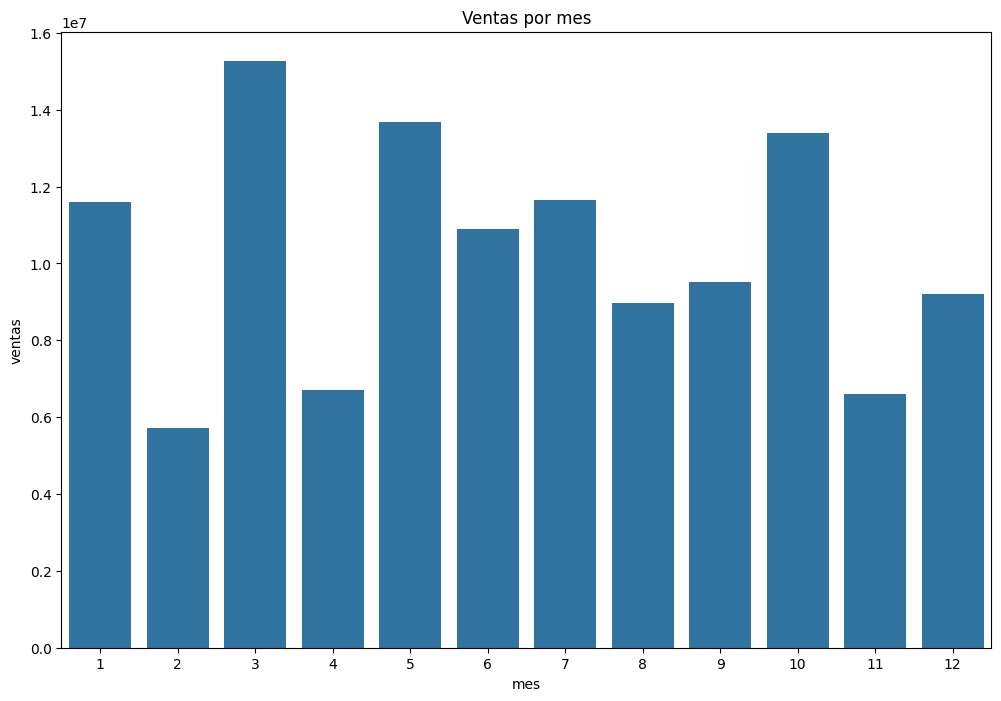

In [20]:
ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index() 
#agrupar el DataFrame ventas por la columna mes.
#sum() para calcular la suma de las ventas para cada mes.
sns.barplot(x='mes', y='ventas', data=ventas_por_mes) 
plt.title('Ventas por mes') 
plt.show()

- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

### Gráfico de barras de las ventas por año
EL mes de marzo, mayo y octubre son los que más se vendieron.  

### Gráfico de línea de las ventas por año

Se observa la curva que dibuja la evolución de las ventas agrupadas por año.

- Explique línea por línea el siguiente código:

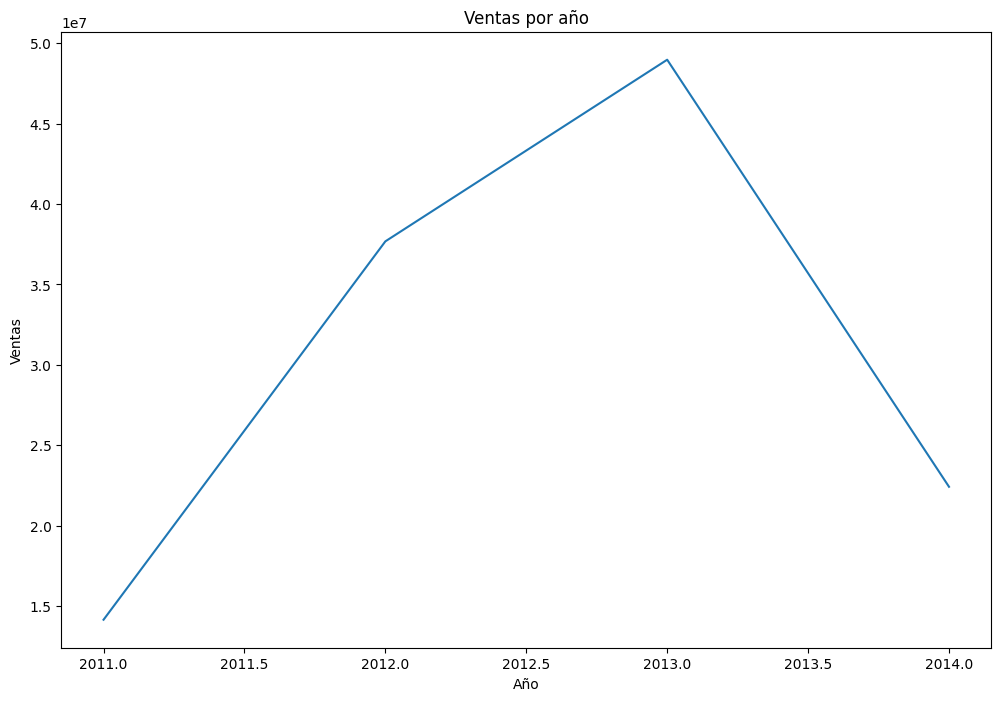

In [21]:
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
plt.title('Ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()

- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

El año con más ventas es desde mediados del 2012 hasta el 2013, y luego declina drásticamente. 

### Prueba formal: Prueba de tendencia

Existen diferentes métodos para realizar el análisis de tendencia, pero uno de los más utilizados es la regresión lineal. La regresión lineal es una técnica estadística que se utiliza para encontrar la relación entre una variable dependiente (por ejemplo, el precio de una acción) y una o más variables independientes (por ejemplo, el tiempo).

Se realiza una prueba de tendencia utilizando la función linregress de la biblioteca scipy.stats. Esta función calcula la pendiente de una línea de regresión lineal y el valor p asociado, que indica la probabilidad de que la pendiente sea cero. Si el valor p es menor que 0,05, se concluye que hay evidencia de una tendencia significativa en los datos.

- Explicar el siguiente código:

In [22]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas'])
print('Pendiente: ', slope)
print('Valor p: ', p_value)

if p_value < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')

Pendiente:  745198.0612926556
Valor p:  0.008957361661883
La tendencia es significativa


## Conclusiones

Luego del análisis realizado se puede concluir que la *pendiente* de **745198.0612926556** indica que hay un aumento en las ventas por año en la base de datos AdventureWorks2019. Es decir, en promedio, las ventas están aumentando en **745198.06 unidades por año**.

El *valor p* de **0.008957361661882999** indica que la probabilidad de obtener una pendiente tan grande como la observada en los datos si la pendiente real es cero es de aproximadamente **0.9%**. Como este valor p es menor que el nivel de significancia comúnmente utilizado de *0,05*, se concluye que hay evidencia suficiente para afirmar que hay una tendencia significativa en los datos.

***Por lo tanto, se puede afirmar que las ventas de AdventureWorks2019 están aumentando significativamente con el tiempo.***

## Recomendaciones

Dado que las ventas están aumentando significativamente con el tiempo, una recomendación para la empresa podría ser continuar invirtiendo en áreas clave para mantener esta tendencia positiva. Por ejemplo, la empresa podría considerar:

* *Mejorar el marketing*: la empresa podría invertir en esfuerzos de marketing para aumentar la conciencia de marca y atraer a más clientes potenciales.

* *Expandir la oferta de productos*: si la empresa ve un aumento en las ventas en ciertas categorías de productos, podría considerar expandir su oferta en esas áreas para aprovechar esa tendencia.

* *Optimizar la cadena de suministro*: si la empresa ve una tendencia a largo plazo de aumento en las ventas, podría considerar optimizar su cadena de suministro para garantizar que pueda satisfacer la demanda futura y mantener su nivel de servicio al cliente.

* *Fomentar la fidelidad del cliente*: la empresa podría implementar programas de lealtad para fomentar la fidelidad del cliente y aumentar la retención.

* *Explorar nuevos canales de venta*: la empresa podría considerar expandir su presencia en línea o abrir nuevas tiendas para aprovechar la tendencia positiva en las ventas.

En general, la recomendación sería que la empresa mantenga un enfoque en la comprensión y la satisfacción de las necesidades de sus clientes, así como en la eficiencia operativa, a medida que busca capitalizar en la tendencia positiva en las ventas.

- Efectuar nuevas consultas sql (desde **Azure Data Studio** o desde **SQL Server Managment Studio**).  Suponga que aún no le han informado del objetivo negocio, por lo tanto debe en primer lugar entender los datos que tiene. Explorar los datos que tienes en la misma base de datos **AdventureWorks2019** y ver que información relevante y de utilidad se puede extraer de allí. Guardar la(s) query(s) final(es) y luego pasarlo a `SQLALchemy` para obtener un dataframe final sobre el cual vas a realizar análisis descriptivos (con pandas) como los efectuados en el caso expuesto arriba. Los plots son opcionales. Elaborar conclusiones y recomendaciones sobre el potencial de tus resultados.   

In [72]:
import pyodbc
import sqlalchemy as sal
from sqlalchemy import create_engine, inspect
import pandas as pd

In [70]:
engine = create_engine('mssql+pyodbc://T04W01/AdventureWorks2019?driver=SQL+Server&Trusted_Connection=yes')

In [77]:
input_query = """
SELECT
    YEAR(soh.OrderDate) AS 'año',
    MONTH(soh.OrderDate) AS 'mes',
    SUM(soh.TotalDue) AS 'ventas', 
    SUM(soh.SubTotal) AS 'subtotal',
    SUM(soh.TaxAmt) AS 'impuestos', 
    SUM(soh.Freight) AS 'envio'
FROM Sales.SalesOrderHeader AS soh
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY YEAR(soh.OrderDate), MONTH(soh.OrderDate);
"""

df = pd.read_sql(input_query, engine)
df

,año,mes,ventas,subtotal,impuestos,envio
0,2011,5,567020.95,503805.92,48163.83,15051.20
1,2011,6,507096.47,458910.82,36712.87,11472.78
2,2011,7,2292182.88,2044600.00,188634.57,58948.31
3,2011,8,2800576.17,2495816.73,232197.66,72561.78
4,2011,9,554791.61,502073.85,40165.91,12551.85
5,2011,10,5156269.53,4588761.82,432386.82,135120.89
6,2011,11,815313.02,737839.82,59027.19,18446.01
7,2011,12,1462448.90,1309863.25,116255.72,36329.92
8,2012,1,4458337.44,3970627.28,371588.69,116121.48
9,2012,2,1649051.90,1475426.91,132285.70,41339.29


In [78]:
df.describe()

,año,mes,ventas,subtotal,impuestos,envio
count,38.00,38.00,38.00,38.00,38.00,38.00
mean,2012.42,6.45,3242547.00,2890694.25,268078.28,83774.48
std,1.00,3.41,1787700.91,1590836.23,150279.30,46962.29
min,2011.00,1.00,54151.48,49005.84,3920.47,1225.17
25%,2012.00,4.00,2013702.89,1816055.94,173462.12,54206.92
50%,2012.00,6.00,3256597.82,2902576.53,269730.50,84290.79
75%,2013.00,9.00,4535017.18,4049271.79,371089.69,115965.55
max,2014.00,12.00,8097036.31,7217531.09,670099.18,209406.05


In [79]:
df.shape

(38, 6)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   año        38 non-null     int64  
 1   mes        38 non-null     int64  
 2   ventas     38 non-null     float64
 3   subtotal   38 non-null     float64
 4   impuestos  38 non-null     float64
 5   envio      38 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.9 KB


In [81]:
df.tail()

,año,mes,ventas,subtotal,impuestos,envio
33,2014,2,1478213.29,1337725.04,107038.64,33449.62
34,2014,3,8097036.31,7217531.09,670099.18,209406.05
35,2014,4,1985886.15,1797173.92,143780.71,44931.52
36,2014,5,6006183.21,5366674.97,487244.33,152263.91
37,2014,6,54151.48,49005.84,3920.47,1225.17


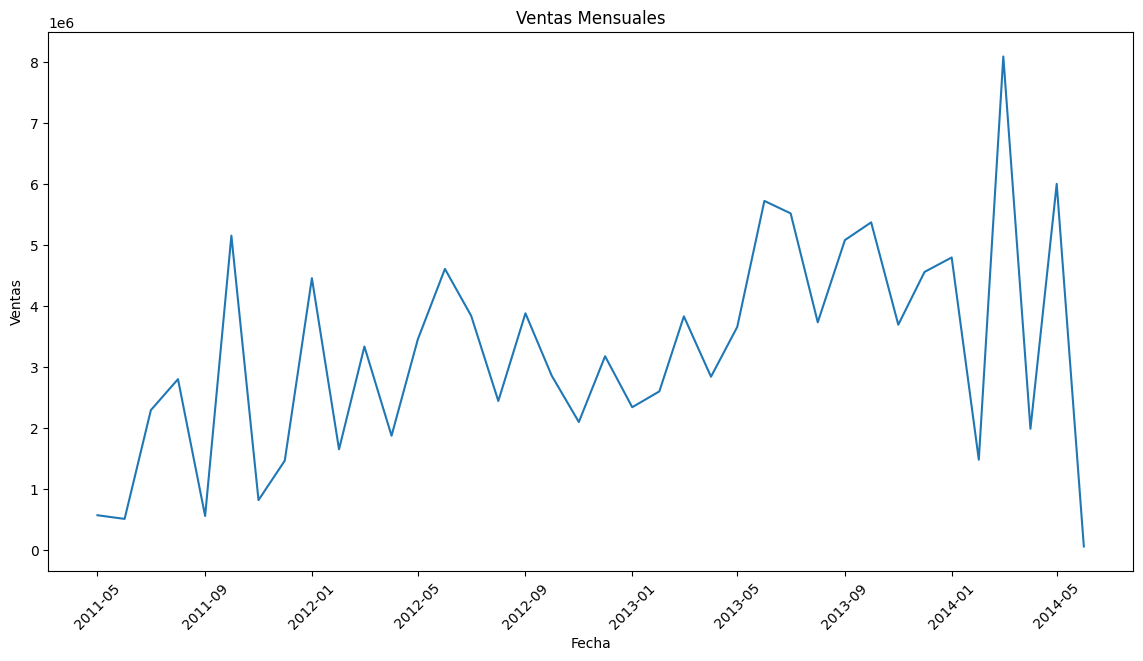

In [83]:
df.rename(columns={'año': 'year', 'mes': 'month'}, inplace=True)

# Convertir las columnas 'year' y 'month' a una fecha
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Establecer la columna de fecha como índice
df.set_index('date', inplace=True)

# Generar gráficos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='ventas')
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

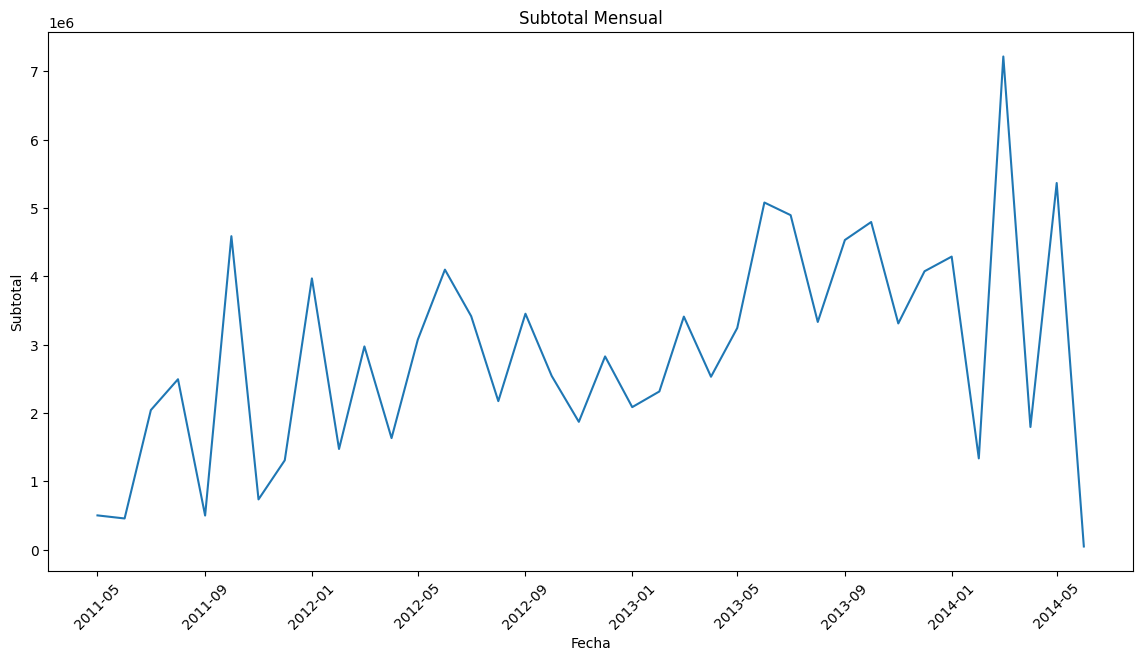

In [84]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='subtotal')
plt.title('Subtotal Mensual')
plt.xlabel('Fecha')
plt.ylabel('Subtotal')
plt.xticks(rotation=45)
plt.show()

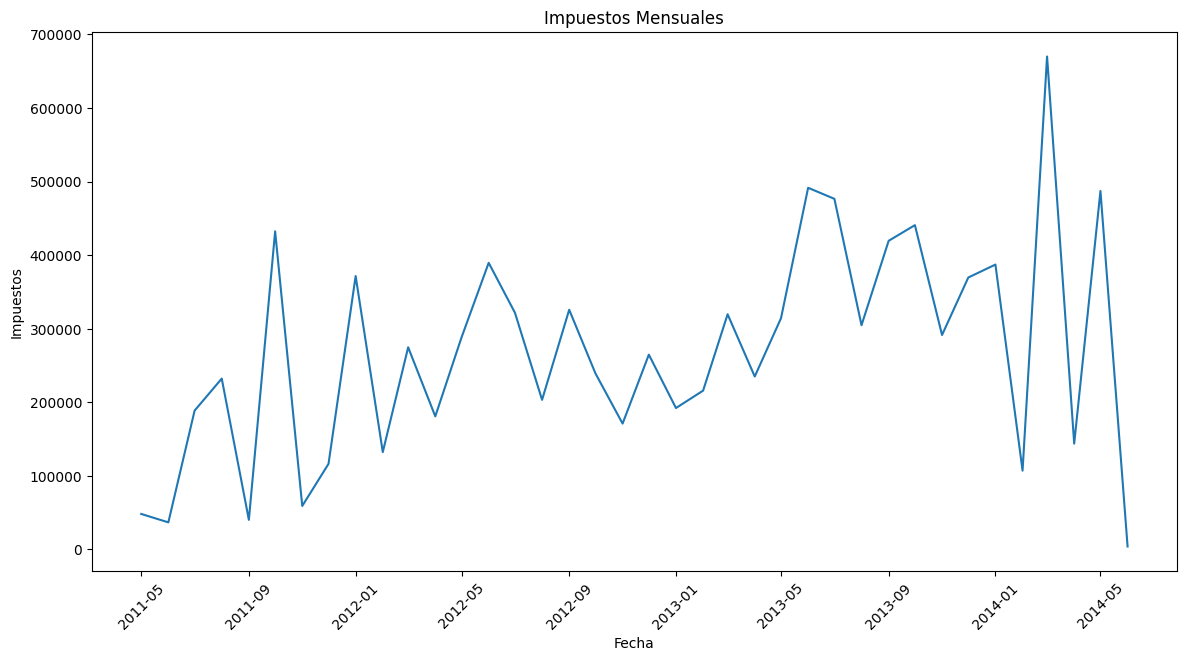

In [85]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='impuestos')
plt.title('Impuestos Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Impuestos')
plt.xticks(rotation=45)
plt.show()

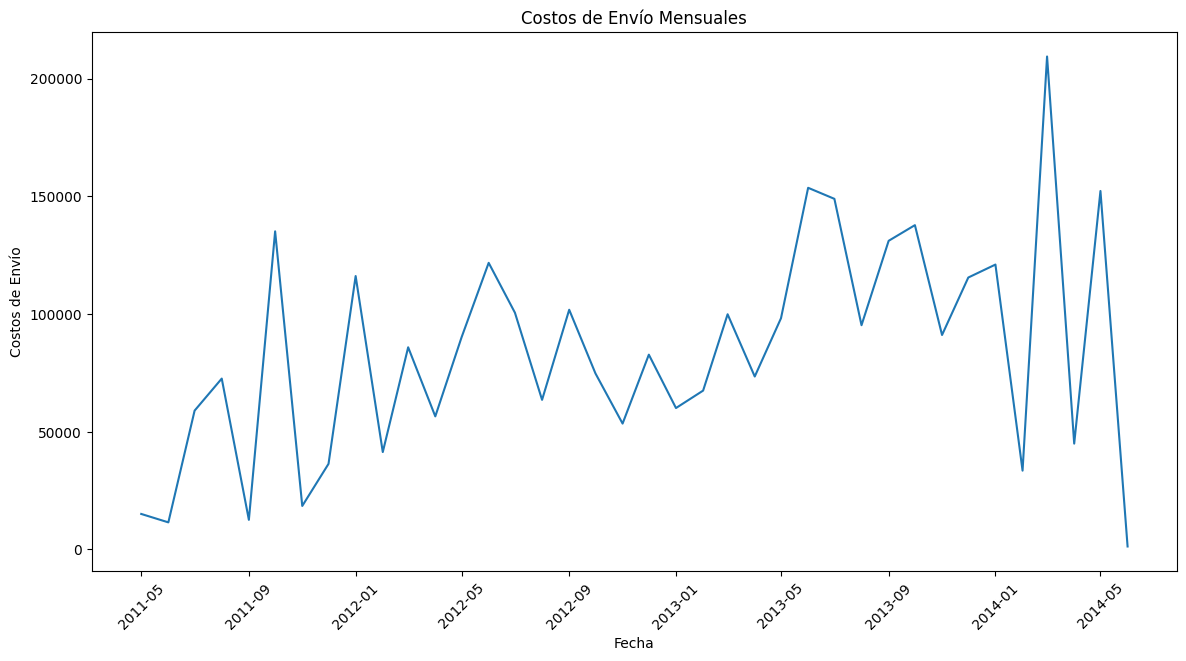

In [86]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='envio')
plt.title('Costos de Envío Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Costos de Envío')
plt.xticks(rotation=45)
plt.show()

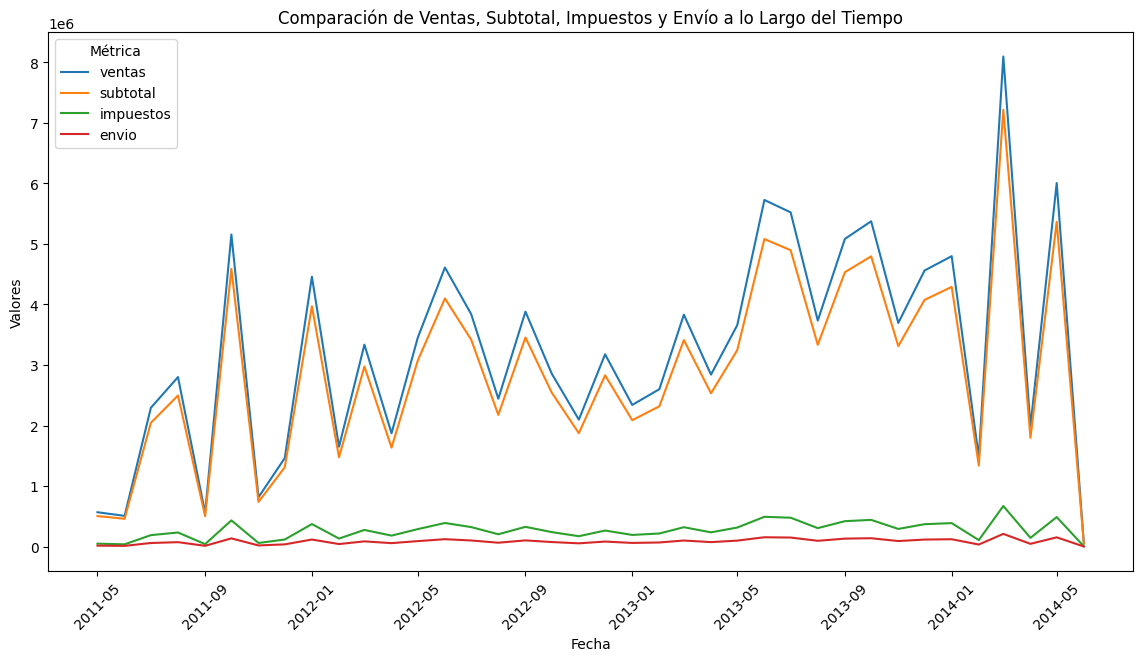

In [87]:
df_melted = df[['ventas', 'subtotal', 'impuestos', 'envio']].reset_index().melt(id_vars='date', var_name='Metric', value_name='Value')

# Crear el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='date', y='Value', hue='Metric')
plt.title('Comparación de Ventas, Subtotal, Impuestos y Envío a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Métrica')
plt.show()

* Tendencias de Ventas:

Las ventas tienen picos significativos en varios meses, especialmente en diciembre y en algunos meses de verano (julio y agosto). Estos picos pueden deberse a la estacionalidad y a eventos específicos.

* Subtotales:

Los subtotales siguen una tendencia muy similar a las ventas, ya que son una gran parte de las ventas totales.
Impuestos:

Los impuestos también muestran una tendencia similar a las ventas, indicando que están directamente relacionados con el volumen de ventas.

* Costos de Envío:

Los costos de envío tienen una menor variabilidad en comparación con las ventas y los subtotales. Sin embargo, también muestran incrementos en los meses de alta actividad de ventas.

* Comparación General:

La comparación de todas las métricas en un solo gráfico permite observar cómo se comportan juntas a lo largo del tiempo. Esto es útil para identificar correlaciones y patrones entre ventas, subtotales, impuestos y costos de envío.